In [195]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [196]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [197]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

In [198]:
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

In [199]:
layer1 = add_layer(xs,1,10,activation_function=tf.nn.relu) 
output = add_layer(layer1,10,1,activation_function=None)

In [200]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-output),reduction_indices=[1]))

In [201]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [202]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

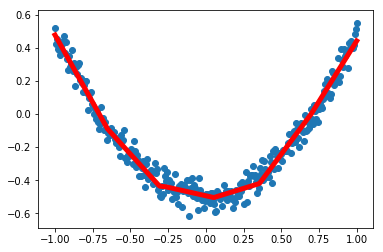

In [211]:
fig = plt.figure()
self = fig.add_subplot(1,1,1)
self.scatter(x_data,y_data)
plt.ion()
#plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            self.lines.remove(lines[0])
        except Exception:
            pass
        output_value = sess.run(output, feed_dict={xs: x_data})
        # plot the output_value
        lines = self.plot(x_data, output_value, color="red", linewidth=5.0, linestyle="-")
        plt.pause(0.1)